# **1. Data Preprocessing**



## **1.1 Load data**

In [2]:
#Task1
import pandas as pd
import requests
import io
import numpy as np
import sklearn
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from matplotlib import pylab as plt
import math

# plottting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from math import ceil

In [3]:
# download and load dataset (scikitlearn)
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
digits = load_digits()
X_digits=digits.data
y_digits=digits.target


print("Shape of X: ",X_digits.shape)
 #print("Features: ",digits.feature_names)
print("Shape of Y: ",y_digits.shape)
digits.images.shape
print(np.unique(y_digits))

Shape of X:  (1797, 64)
Shape of Y:  (1797,)
[0 1 2 3 4 5 6 7 8 9]


In [4]:
#download and load dataset2 (openML)
#http://scikit-learn.org/stable/datasets/index.html#openml
#mice = fetch_openml(name='miceprotein', version=4)
iris = fetch_openml(name="iris", version=3)
X_iris=iris.data
y_iris=iris.target

print("Shape of X: ",X_iris.shape)
print("Shape of Y: ",y_iris.shape)
print("Features: ",iris.feature_names)

print(np.unique(y_iris))
#print('Class distribution: ', np.bincount(y_iris))


Shape of X:  (150, 4)
Shape of Y:  (150,)
Features:  ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
['N' 'P']


In [5]:
#download and load dataset3 (openML)
iris2 = fetch_openml(name="iris", version=1)
X_iris2=iris2.data
y_iris2=iris2.target

print("Shape of X: ",X_iris2.shape)
print("Shape of Y: ",y_iris2.shape)
print("Features: ",iris.feature_names)

Shape of X:  (150, 4)
Shape of Y:  (150,)
Features:  ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']


In [6]:
#download and load dataset4 (openML)
vehicle = fetch_openml(name="vehicle")
X_vehicle=vehicle.data
y_vehicle=vehicle.target

print("Shape of X: ",X_vehicle.shape)
print("Shape of Y: ",y_vehicle.shape)
print("Features: ",vehicle.feature_names)
print(np.unique(y_vehicle))

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


Shape of X:  (846, 18)
Shape of Y:  (846,)
Features:  ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO']
['bus' 'opel' 'saab' 'van']


## **1.2 Feature Engineering**


### **1.2.1 Digits Dataset**

**One hot encoding**

In [7]:
# one hot encoding
# totally 10 digits encode 9 digits 
# avoid linear dependent
N = len(y_digits)
# 10 new labels and 1 original label
new_y_digits=np.zeros((N,10))
for i in range(N):
  label = y_digits.transpose()[i]
  '''
  new_y_digits[i][0]= label
  if int(label) is not 0:
    new_y_digits[i][int(label)] = 1
  '''
  new_y_digits[i][int(label)] = 1
print('Dimension of digits label:', new_y_digits.shape)
new_y_digits

Dimension of digits label: (1797, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

**Data Normalization**

In [8]:
from sklearn import preprocessing
X_digits = preprocessing.scale(X_digits)

In [9]:
features=["feature "+str(i+1) for i in range(64)]
features.append('digits_label')
df_digits=pd.DataFrame(data=[np.append(X_digits[i],y_digits[i]) for i in range(1797)],columns=features)
#print("Number of labels: ",len(df_digits.digits_label.value_counts()),"\n" )
df_digits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   feature 1     1797 non-null   float64
 1   feature 2     1797 non-null   float64
 2   feature 3     1797 non-null   float64
 3   feature 4     1797 non-null   float64
 4   feature 5     1797 non-null   float64
 5   feature 6     1797 non-null   float64
 6   feature 7     1797 non-null   float64
 7   feature 8     1797 non-null   float64
 8   feature 9     1797 non-null   float64
 9   feature 10    1797 non-null   float64
 10  feature 11    1797 non-null   float64
 11  feature 12    1797 non-null   float64
 12  feature 13    1797 non-null   float64
 13  feature 14    1797 non-null   float64
 14  feature 15    1797 non-null   float64
 15  feature 16    1797 non-null   float64
 16  feature 17    1797 non-null   float64
 17  feature 18    1797 non-null   float64
 18  feature 19    1797 non-null 

In [10]:
df_digits['digits_label'].value_counts()/1797

3.0    0.101836
5.0    0.101280
1.0    0.101280
6.0    0.100723
4.0    0.100723
9.0    0.100167
7.0    0.099610
0.0    0.099054
2.0    0.098497
8.0    0.096828
Name: digits_label, dtype: float64

**Correlarion between features and label**

In [11]:
tmp=list(df_digits.columns)
corr=df_digits[tmp].corr() 
corr
#corr.loc[corr.digits_label>0.1]

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29,feature 30,feature 31,feature 32,feature 33,feature 34,feature 35,feature 36,feature 37,feature 38,feature 39,feature 40,feature 41,feature 42,feature 43,feature 44,feature 45,feature 46,feature 47,feature 48,feature 49,feature 50,feature 51,feature 52,feature 53,feature 54,feature 55,feature 56,feature 57,feature 58,feature 59,feature 60,feature 61,feature 62,feature 63,feature 64,digits_label
feature 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature 2,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,NaN,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,NaN,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
feature 3,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,NaN,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,NaN,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
feature 4,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,NaN,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,NaN,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
feature 5,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,NaN,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,NaN,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature 61,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,-0.077451,0.046670,0.015946,-0.199519,-0.298199,-0.100317,0.021630,0.036393,0.119076,0.207694,0.002642,-0.120517,-0.079916,-0.002784,0.008059,0.029233,0.083202,0.066731,-0.108922,-0.163125,-0.14

**Class Distribution**

In [12]:
unique_digits, counts_digits = np.unique(y_digits, return_counts=True)
dist_digits = pd.DataFrame(counts_digits, index = unique_digits)
dist_digits.columns = ["class distribution (count)"]
dist_digits

,class distribution (count)
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174
9,180


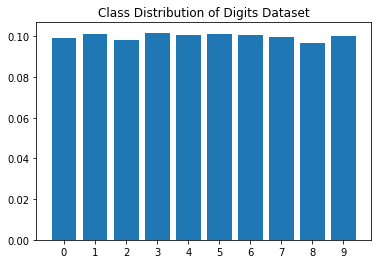

In [13]:
plt.bar(unique_digits, counts_digits/sum(counts_digits))
plt.xticks(unique_digits, unique_digits)
plt.title("Class Distribution of Digits Dataset")
plt.show()

### **1.2.2 Iris dataset**

**One hot encoding**




In [14]:
# convert label 'N' and 'P' to 0 and 1

categorical_y_iris=np.zeros((150,))
for i in range(len(y_iris)):
  if y_iris[i]=='P':
    categorical_y_iris[i]=0
  else:
    categorical_y_iris[i]=1
#print(categorical_y_iris)

new_y_iris=np.zeros((150,2))
for i in range(len(y_iris)):
  if y_iris[i]=='P':
    new_y_iris[i, 1]=1
  else:
    new_y_iris[i, 0]=1
#print(new_y_iris)

**Data Normalization**

Convert iris dataset to pandas dataframe

In [16]:
np.append(X_iris,y_iris).shape
tmp=['sepallength','sepalwidth','petallength','petalwidth','iris_label0','iris_label1']
df_iris=pd.DataFrame(data=[np.append(X_iris[i],new_y_iris[i]) for i in range(150)],columns=tmp)
df_iris["sepallength"] = df_iris.sepallength.astype(float)
df_iris["sepalwidth"] = df_iris.sepalwidth.astype(float)
df_iris["petallength"] = df_iris.petallength.astype(float)
df_iris["petalwidth"] = df_iris.petalwidth.astype(float)
'''
def convert_y(c):
  if c=='N':
    return 0
  if c=='P':
    return 1
'''

#df_iris['new_iris_label0']=[ convert_y(i) for i in df_iris.iris_label0]
#df_iris['new_iris_label1']=[ convert_y(i) for i in df_iris.iris_label1]
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris_label0  150 non-null    float64
 5   iris_label1  150 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


Correlation bwteen the fatures and 'iris_label': 



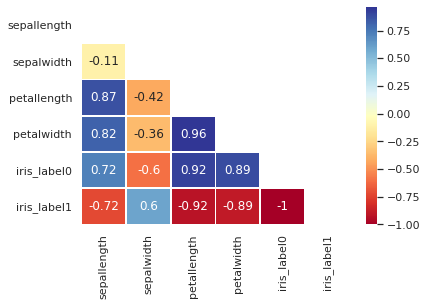

In [17]:
#tmp.append('new_iris_label0')
#tmp.append('new_iris_label1')
corr=df_iris[tmp].corr() 
# mask the upper triangle
sns.set(style="white")
#plt.figure(figsize=(18,9.5))
mask=np.triu(np.ones_like(corr,dtype=np.bool))
# colour
cmap=sns.diverging_palette(240,10,n=9)
# annot to display the value
sns.heatmap(corr,annot=True,mask=mask,cmap='RdYlBu',linewidths=0.6)
print("Correlation bwteen the fatures and 'iris_label': \n")


**Class Distribution**




In [18]:
unique_iris, counts_iris = np.unique(y_iris, return_counts=True)
dist_iris = pd.DataFrame(counts_iris, index = unique_iris)
dist_iris.columns = ["class distribution (count)"]
dist_iris

,class distribution (count)
N,100
P,50


In [ ]:
plt.bar(unique_iris, counts_iris/sum(counts_iris))
plt.xticks(unique_iris, unique_iris)
plt.title("Class Distribution of Iris Dataset")
plt.show()

### **1.2.3 Vehicle Dataset**

**One hot Encoding**

In [ ]:
N,D=X_vehicle.shape
new_y_vehicle = np.zeros((N,4))
for i in range(N):
  if y_vehicle[i]=='van':
    new_y_vehicle[i][0]=1
  elif y_vehicle[i]=='saab':
    new_y_vehicle[i][1]=1
  elif y_vehicle[i]=='bus':
    new_y_vehicle[i][2]=1
  else:
    new_y_vehicle[i][3]=1


new_y_vehicle 
print(D)

**Class Distribution**

In [ ]:
name=['van','saab','bus','opel']
acc=[0.0,0.0,0.0,0.0]
for i in range(N):
  if y_vehicle[i]=='van':
    acc[0]=acc[0]+1
  elif y_vehicle[i]=='saab':
    acc[1]=acc[1]+1
  elif y_vehicle[i]=='bus':
    acc[2]=acc[2]+1
  else:
    acc[3]=acc[3]+1

[name[i]+": "+str(acc[i]/sum(acc)) for i in range(4)]

In [ ]:
unique_vehicle, counts_vehicle = np.unique(y_vehicle, return_counts=True)
dist_vehicle = pd.DataFrame(counts_vehicle, index = unique_vehicle)
dist_vehicle.columns = ["class distribution (count)"]
dist_vehicle

In [ ]:
plt.bar(unique_vehicle, counts_vehicle/sum(counts_vehicle))
plt.xticks(unique_vehicle, unique_vehicle)
plt.title("Class Distribution of Vehicle Dataset")
plt.show()

**Data Normalization**

In [ ]:
from sklearn import preprocessing
X_vehicle = preprocessing.scale(X_vehicle)

# **2. Softmax Regression Model**

## **2.1 Gradient descent with momentum optimizer**

In [ ]:
import numpy as np
import math

def minibatch(batch_size,gradient_fn, x, y, w):
    sample_size = len(x)
    C =len(y[0])
    D=len(x[0])
    #print("D:",D)
    if batch_size==1:
        grad = np.zeros((D,C))
        for i in range (sample_size-1):
            l_index = i
            r_index= i+1
            x_batch = x[l_index:r_index]
            y_batch = y[l_index:r_index]
            # return grad is D by C matrix
            grad=grad+gradient_fn(x_batch, y_batch, w)
            
        return grad


        
    num_batch = math.ceil(sample_size/batch_size)
    grad = np.ones((D,C))
    for i in range (num_batch):
        l_index = i*batch_size
        r_index= min( ((i+1)*batch_size-1),sample_size-1)
        x_batch = x[l_index:r_index]
        y_batch = y[l_index:r_index]
        # return grad is D by C matrix
        #print("llala",x_batch.shape, w.shape)
        grad=grad+gradient_fn(x_batch, y_batch, w) 

    return grad 




In [ ]:
class GradientDescentwithMomentum:
    
    def __init__(self, momentum = 0.95,batch_size = 2000, learning_rate=.001, max_iters=2, epsilon=1e-8, record_history=False):
        self.momentum = momentum
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []  

    def minibatch(self,gradient_fn, x, y, w):
        print("called1")
        batch_size = self.batch_size
        sample_size = len(x)
        C =len(y[0])
        D=len(x[0])
        num_batch = (sample_size/batch_size)+1
        num_batch=int(num_batch)
        grad = np.zeros((D,C))
        for i in range (num_batch):
            l_index = i*batch_size
            r_index= min( ((i+1)*batch_size-1),sample_size-1)
            x_batch = x[l_index:r_index]
            y_batch = y[l_index:r_index]
            # return grad is D by C matrix
            grad=grad+gradient_fn(x_batch, y_batch, w) 

        return grad 
            
    def run(self, gradient_fn, x, y, w):
        # w: weight of new parameter (1*CD)
        # delta_w: initialize delta_w with w_0 (1*CD)
        delta_w = w
        C = len(y[0])
        N, D = x.shape
        grad = np.zeros((D,C))
        grad = np.inf
        #I = np.identity(N)
        #beta=np.ones(C*D) * momentum
        #1_beta = np.idetity(C*D)-np.ones(C*D) * momentum

        t = 1
        accuracy=[]
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            # gradient_fn is something like the magnitude of derivative
            # if it is small enough, we can stop the loop
            # the output grad is D by C
            grad = minibatch(self.batch_size,gradient_fn, x, y, w)
      
            delta_w = self.momentum*delta_w+ (1-self.momentum)*grad
            w = w - self.learning_rate * delta_w   

            if self.record_history:
                self.w_history.append(w)
            
            t += 1
        
        
        return w


## **2.2 Multi-class Logistic Regression Model**

In [ ]:
def softmax_fn(x, w):
  z = x@w
  z = z - np.max(z, axis = 1, keepdims=True)
  softmax = np.exp(z)/np.sum(np.exp(z), axis = 1, keepdims= True)
  for i in range(len(softmax)):
    row = softmax[i]
    m=max(row)
    for j in range(len(row)):
      if row[j]>=m:
        row[j]=1
      if row[j] < m:
        softmax[i][j]=0
  
  return softmax

In [ ]:
class MultiClassLogisticRegression:

    def __init__(self, add_bias = True):
       self.add_bias = add_bias
       pass

    def fit(self, x, y, optimzer):
        if x.ndim == 1:
            x = x[:, None]
        '''
        if n.dim == 1:
          x = x[:, None]
        '''
        if self.add_bias:
          N = x.shape[0]
      
          x = np.column_stack([x,np.ones(N)])
        C = len(y[0])
        N, D = x.shape

        def gradient(x, y, w):
          yh = softmax_fn(x, w)
          dW = np.dot(x.T, yh - y)/N
          #grad = dW.flatten() #Is this step necessary?
          #return grad
          return dW

        w0 = np.zeros((D, C))
        self.w = optimzer.run(gradient, x, y, w0)
        return self
  
    def predict(self, x):
        if x.ndim == 1: 
          x = x[:, None]
        N, D = x.shape
        if self.add_bias:
          x = np.column_stack([x,np.ones(N)])
        #print(self.w)
        #print(x)
        yh = softmax_fn(x, self.w)
        return yh

# **3. Data training**


## **3.1 Hyperparameters of the optimization procedure**




### **3.1.1 Functions**


#### **a) Cross Validation & Grid Search Function**

In [ ]:
import math
def cross_validation(n_folds,x,y):
    df=np.column_stack([x,y])
    N, D = x.shape
    C= len(y[0])
    X_test=[]
    X_train=[]
    y_test=[]
    y_train=[]
    #index=[i for i in range(N)]
    test_index=math.ceil(N/n_folds)
    for i in range(n_folds):
        df_tmp=np.random.permutation(df)
        X_test_tmp=df_tmp[0:test_index,0:D]
        y_test_tmp=df_tmp[0:test_index,D:(D+C)]
        X_train_tmp=df_tmp[test_index:N,0:D]
        y_train_tmp=df_tmp[test_index:N,D:(D+C)]

        X_test.append(X_test_tmp)
        y_test.append(y_test_tmp)
        X_train.append(X_train_tmp)
        y_train.append(y_train_tmp)

    
    return X_test,X_train,y_test,y_train


#X_test,X_train,y_test,y_train = cross_validation(5,X_digits,new_y_digits)

In [ ]:
def getAcc(y_true,y_hat):
  N=len(y_true)
  acc=0.0
  #y_hat=model.predict(X_digits[1701:1797,:])
  #y_true=new_y_digits[1701:1797,:]
  for i in range(N):
    row = y_true[i]    
    for j in range (len(row)):
      if y_true[i][j]==y_hat[i][j]:
        if y_true[i][j]==1:
          acc=acc+1
      else:
        break
  return acc/N


In [ ]:
def simple_grid_search(momentum,learning_rate, batch_size,X,y):
      n_folds=5
      X_test,X_train,y_test,y_train = cross_validation(n_folds,X,y)
      max_accuracy=-np.inf
      best_parameter={}
      
      for m in momentum: 
        for l in learning_rate:
          for b in batch_size:
              accuracy=0.0
              for trial in range(n_folds):
                  optimizer= GradientDescentwithMomentum(momentum=m,batch_size = b,learning_rate=l, max_iters=200, record_history=True)
                  model = MultiClassLogisticRegression()
                  model.fit(X_train[trial],y_train[trial],optimizer)
                  y_hat=model.predict(X_test[trial])
                  accuracy = accuracy+ getAcc(y_hat, y_test[trial])

              accuracy=accuracy/n_folds
              print("momentum:",m,"  leanrning rate:",l, "  batch_size:",b,"   Accuracy:",accuracy)
              if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_parameter['momentum']=m
                best_parameter['learning_rate']=l
                best_parameter['batch_size']=b
      print('MAX Accuracy: ', max_accuracy)
      print("Best parameter: ",best_parameter)
      return best_parameter

#### **b) Plotting Function**

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

def plotting(xaxis,acc1,acc2,hyperparameter_name,loss_name):
    line1, =plt.plot(xaxis, acc1,label='validation')
    line2, =plt.plot(xaxis, acc2,label='training')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
    plt.title(loss_name +' vs. '+hyperparameter_name)
    plt.xlabel(hyperparameter_name)
    plt.ylabel(loss_name)
    plt.show()


In [ ]:
# plotting momentum change
def plotting_momentum_change(momentum,l, b,X,y):
    n_folds=5
    X_test,X_train,y_test,y_train = cross_validation(n_folds,X,y)
    acc1=[]
    acc2=[]
    for m in momentum:
          validation_accuracy=0.0
          training_accuracy=0.0
          for trial in range(n_folds):
                  optimizer= GradientDescentwithMomentum(momentum=m,batch_size = b,learning_rate=l, max_iters=200, record_history=True)
                  model = MultiClassLogisticRegression()
                  model.fit(X_train[trial],y_train[trial],optimizer)
                  y_hat=model.predict(X_test[trial])
                  validation_accuracy = validation_accuracy+ getAcc(y_hat, y_test[trial])
                  training_accuracy= training_accuracy+ getAcc(model.predict(X_train[trial]),y_train[trial])

          validation_accuracy=validation_accuracy/n_folds
          training_accuracy=training_accuracy/n_folds
          #print(m, " ",accuracy)
          acc1.append(validation_accuracy)
          acc2.append(training_accuracy)
    plotting(momentum,acc1,acc2,'momentum','Average Accuracy')
   

#plotting_momentum_change([0.9,0.92,0.94,0.96,0.98,0.99],learning_rate,batch_size,X_digits,new_y_digits)

In [ ]:
def plotting_learningRate_change(m,learning_rate, b,X,y):
    n_folds=5
    X_test,X_train,y_test,y_train = cross_validation(n_folds,X,y)
    acc1=[]
    acc2=[]
    for l in learning_rate:
          validation_accuracy=0.0
          training_accuracy=0.0
          for trial in range(n_folds):
                  optimizer= GradientDescentwithMomentum(momentum=m,batch_size = b,learning_rate=l, max_iters=200, record_history=True)
                  model = MultiClassLogisticRegression()
                  model.fit(X_train[trial],y_train[trial],optimizer)
                  y_hat=model.predict(X_test[trial])
                  validation_accuracy = validation_accuracy+ getAcc(y_hat, y_test[trial])
                  training_accuracy= training_accuracy+ getAcc(model.predict(X_train[trial]),y_train[trial])

                  
          validation_accuracy=validation_accuracy/n_folds
          training_accuracy=training_accuracy/n_folds
          #print(m, " ",accuracy)
          acc1.append(validation_accuracy)
          acc2.append(training_accuracy)
    plotting(learning_rate,acc1,acc2,'learning_rate','Average Accuracy')


In [ ]:
def plotting_batch_change(m,l, batch_size,X,y):
    n_folds=5
    X_test,X_train,y_test,y_train = cross_validation(n_folds,X,y)
    acc1=[]
    acc2=[]
    for b in batch_size:
          validation_accuracy=0.0
          training_accuracy=0.0
          for trial in range(n_folds):
                  optimizer= GradientDescentwithMomentum(momentum=m,batch_size = b,learning_rate=l, max_iters=200, record_history=True)
                  model = MultiClassLogisticRegression()
                  model.fit(X_train[trial],y_train[trial],optimizer)
                  y_hat=model.predict(X_test[trial])
                  validation_accuracy = validation_accuracy+ getAcc(y_hat, y_test[trial])
                  training_accuracy= training_accuracy+ getAcc(model.predict(X_train[trial]),y_train[trial])


          validation_accuracy=validation_accuracy/n_folds
          training_accuracy=training_accuracy/n_folds
          #print(m, " ",accuracy)
          acc1.append(validation_accuracy)
          acc2.append(training_accuracy)
    plotting(batch_size,acc1,acc2,'batch_size','Average Accuracy')

   


### **3.1.2 Digits Dataset**

**Find the optimal hyperparameter**

In [ ]:
N, D = X_digits.shape

#momentum=np.arange(0.85, 1, 0.02).tolist()
momentum=[0.9,0.925,0.95,0.975,0.99]
learning_rate=[0.001,0.005,0.1,0.05,0.1]
#batch_size= np.arange(1, N, math.ceil(N/5)).tolist()
batch_size=[1,100,math.ceil(N/8),math.ceil(N/4),math.ceil(N/2),N]


best_parameter=simple_grid_search(momentum,learning_rate,batch_size,X_digits,new_y_digits)



momentum: 0.9   leanrning rate: 0.001   batch_size: 1    Accuracy: 0.9555555555555555
momentum: 0.9   leanrning rate: 0.001   batch_size: 100    Accuracy: 0.953888888888889
momentum: 0.9   leanrning rate: 0.001   batch_size: 225    Accuracy: 0.9583333333333334
momentum: 0.9   leanrning rate: 0.001   batch_size: 450    Accuracy: 0.9566666666666667
momentum: 0.9   leanrning rate: 0.001   batch_size: 899    Accuracy: 0.9549999999999998
momentum: 0.9   leanrning rate: 0.001   batch_size: 1797    Accuracy: 0.9550000000000001
momentum: 0.9   leanrning rate: 0.005   batch_size: 1    Accuracy: 0.9555555555555555
momentum: 0.9   leanrning rate: 0.005   batch_size: 100    Accuracy: 0.953888888888889
momentum: 0.9   leanrning rate: 0.005   batch_size: 225    Accuracy: 0.9583333333333334
momentum: 0.9   leanrning rate: 0.005   batch_size: 450    Accuracy: 0.9566666666666667
momentum: 0.9   leanrning rate: 0.005   batch_size: 899    Accuracy: 0.9549999999999998
momentum: 0.9   leanrning rate: 0.005

KeyboardInterrupt: ignored

In [ ]:
best_parameter={'momentum': 0.975, 'learning_rate': 0.005, 'batch_size': 899}

batch_size= best_parameter['batch_size']
momentum=best_parameter['momentum']
learning_rate=best_parameter['learning_rate']

X_test,X_train,y_test,y_train = cross_validation(5,X_digits,new_y_digits)
acc=[]
for trial in range(5):
    optimizer= GradientDescentwithMomentum(momentum, batch_size, learning_rate, max_iters=200, record_history=True)
    model = MultiClassLogisticRegression()
    model.fit(X_train[trial],y_train[trial],optimizer)
    y_hat=model.predict(X_test[trial])
      
    print("trial:",trial,"accuracy",getAcc(y_hat, y_test[trial]))
    acc.append(getAcc(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

trial: 0 accuracy 0.975
trial: 1 accuracy 0.9416666666666667
trial: 2 accuracy 0.9472222222222222
trial: 3 accuracy 0.9527777777777777
trial: 4 accuracy 0.9388888888888889
The mean accuracy of 5-fold CV: 0.9511111111111111   std: 0.012862041003100245



**Plotting hyperparamter**

In [ ]:
# with accuracy 96.666666%
best_parameter={'momentum': 0.975, 'learning_rate': 0.005, 'batch_size': 899}

batch_size= best_parameter['batch_size']
momentum=best_parameter['momentum']
learning_rate=best_parameter['learning_rate']


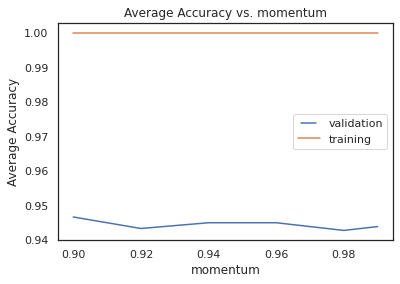

In [ ]:
#plotting the last 200 steps
plotting_momentum_change([0.9,0.92,0.94,0.96,0.98,0.99],learning_rate,batch_size,X_digits,new_y_digits)


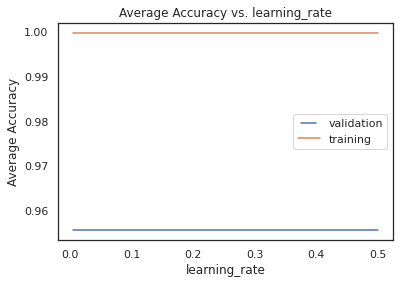

In [ ]:
plotting_learningRate_change(momentum,[0.005,0.01,0.025,0.05,0.1,0.25,0.5],batch_size,X_digits,new_y_digits)

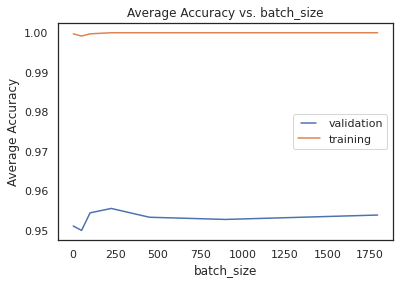

In [ ]:
N=len(new_y_digits)
batch_size_list=[1,50,100,math.ceil(N/8),math.ceil(N/4),math.ceil(N/2),N]
plotting_batch_change(momentum,learning_rate,batch_size_list,X_digits,new_y_digits)

### **3.1.3 Iris Dataset**

**Find the optimal hyperparameter**

In [ ]:
import math

N,C=new_y_iris.shape
momentum = [0.9,0.925,0.95,0.975,0.99]
learning_rate = [0.005,0.01,0.05,0.1]
batch_size_iris = [1, math.ceil(N/8), math.ceil(N/4), math.ceil(N/2), N]

simple_grid_search(momentum, learning_rate, batch_size_iris, X_iris, new_y_iris)

In [ ]:
best_parameter_iris={'momentum': 0.975, 'learning_rate': 0.005, 'batch_size': 899}

batch_size_iris= best_parameter_iris['batch_size']
momentum_iris=best_parameter_iris['momentum']
learning_rate_iris=best_parameter_iris['learning_rate']

X_test,X_train,y_test,y_train = cross_validation(5,X_iris, new_y_iris)
acc=[]
for trial in range(5):
    optimizer= GradientDescentwithMomentum(momentum_iris, batch_size_iris, learning_rate_iris, max_iters=200, record_history=True)
    model = MultiClassLogisticRegression()
    model.fit(X_train[trial],y_train[trial],optimizer)
    y_hat=model.predict(X_test[trial])
      
    print("trial:",trial,"accuracy",getAcc(y_hat, y_test[trial]))
    acc.append(getAcc(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

trial: 0 accuracy 1.0
trial: 1 accuracy 1.0
trial: 2 accuracy 1.0
trial: 3 accuracy 1.0
trial: 4 accuracy 1.0
The mean accuracy of 5-fold CV: 1.0   std: 0.0


**Plotting hyperparamter**

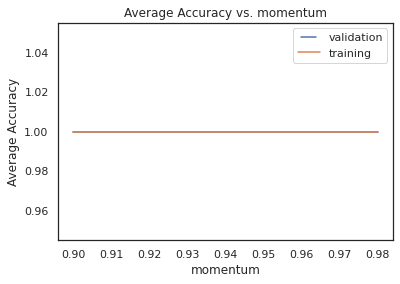

In [ ]:
plotting_momentum_change(np.arange(0.9, 1, 0.02).tolist(), learning_rate_iris, batch_size_iris, X_iris, new_y_iris)

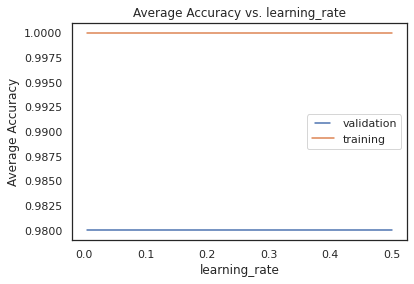

In [ ]:
plotting_learningRate_change(momentum_iris, [0.005,0.01,0.025,0.05,0.1,0.25,0.5], batch_size_iris, X_iris, new_y_iris)

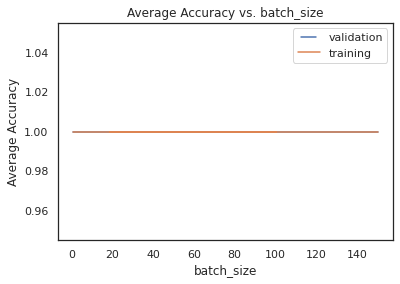

In [ ]:
N=len(new_y_iris)
batch_size_list=[1,50,100,math.ceil(N/8),math.ceil(N/4),math.ceil(N/2),N]
plotting_batch_change(momentum_iris, learning_rate_iris,batch_size_list, X_iris, new_y_iris)

### **3.1.4 Vehicle Dataset**

**Find the optimal parameter**

In [ ]:
import math

N,C=new_y_vehicle.shape
momentum = [0.9,0.95,0.99]
learning_rate = [0.005,0.01,0.05,0.1]
batch_size_iris = [1, math.ceil(N/6), math.ceil(N/2), N]

simple_grid_search(momentum, learning_rate, batch_size_iris, X_vehicle, new_y_vehicle)

**Calculate std and mean**

In [ ]:

best_parameter_vehicle={'batch_size': 423, 'learning_rate': 0.005, 'momentum': 0.95}

batch_size_vehicle= best_parameter_vehicle['batch_size']
momentum_vehicle=best_parameter_vehicle['momentum']
learning_rate_vehicle=best_parameter_vehicle['learning_rate']

X_test,X_train,y_test,y_train = cross_validation(5,X_vehicle,new_y_vehicle)
acc=[]
for trial in range(5):
    optimizer= GradientDescentwithMomentum(momentum_vehicle, batch_size_vehicle, learning_rate_vehicle, max_iters=200, record_history=True)
    model = MultiClassLogisticRegression()
    model.fit(X_train[trial],y_train[trial],optimizer)
    y_hat=model.predict(X_test[trial])
      
    print("trial:",trial,"accuracy",getAcc(y_hat, y_test[trial]))
    acc.append(getAcc(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)


trial: 0 accuracy 0.7529411764705882
trial: 1 accuracy 0.7764705882352941
trial: 2 accuracy 0.7647058823529411
trial: 3 accuracy 0.7647058823529411
trial: 4 accuracy 0.7058823529411765
The mean accuracy of 5-fold CV: 0.7529411764705882   std: 0.024677855251062364


**Plotting Hyperparameter**

In [ ]:
plotting_momentum_change(np.arange(0.9, 1, 0.01).tolist(), learning_rate, batch_size, X_vehicle, new_y_vehicle)

In [ ]:
plotting_learningRate_change(momentum,[0.005,0.01,0.025,0.05,0.1,0.25,0.5],batch_size,X_vehicle,new_y_vehicle)

In [ ]:
N=len(new_y_vehicle)
batch_size_list=[1,50,math.ceil(N/8),math.ceil(N/4),math.ceil(N/2),N]
plotting_batch_change(momentum,learning_rate,batch_size_list,X_vehicle,new_y_vehicle)

## **3.2 Termination Condition**

**Initially, Terminate the training in 200 iteration**

In [ ]:
def termination(momentum, learning_rate, batch_size,X_train, X_test, y_test, y_train):
  N1,D=X_train.shape
  N2,D=X_test.shape
  C = len(y_test[0])
  X_train_bias= np.column_stack([X_train,np.ones(N1)])/N1
  X_test_bias= np.column_stack([X_test,np.ones(N2)])/N2
  acc1=[]
  acc2=[]
  iteration=[]
  optimizer= GradientDescentwithMomentum(momentum=momentum,batch_size = batch_size,learning_rate=learning_rate, max_iters=200, record_history=True)
  model = MultiClassLogisticRegression()
  model.fit(X_train,y_train,optimizer)
  #y_hat=model.predict(X_test[trial])

  max_accuracy=0.0
  for t,w in enumerate(optimizer.w_history):
    y_hat_train=softmax_fn(X_train_bias, w)
    y_hat_test=softmax_fn(X_test_bias, w)
    #print("train:",getAcc(y_train,y_hat_train)," test:",getAcc(y_test,y_hat_test))
    acc1.append(getAcc(y_train,y_hat_train))
    acc2.append(getAcc(y_test,y_hat_test)) 
    iteration.append(t)
    if getAcc(y_test,y_hat_test) > max_accuracy:
      max_accuracy = getAcc(y_test,y_hat_test) 
    


  print(max_accuracy)
  plotting(iteration,acc2,acc1,'iteration','Accuracy')


**Terminate when ono-increase in 20 iterations**

In [ ]:
def new_termination(momentum, learning_rate, batch_size,X_train, X_test, y_test, y_train,T):
  N1,D=X_train.shape
  N2,D=X_test.shape
  C = len(y_test[0])
  X_train_bias= np.column_stack([X_train,np.ones(N1)])/N1
  X_test_bias= np.column_stack([X_test,np.ones(N2)])/N2
  acc1=[]
  acc2=[]
  iteration=[]
  optimizer= GradientDescentwithMomentum(momentum=momentum,batch_size = batch_size,learning_rate=learning_rate, max_iters=200, record_history=True)
  model = MultiClassLogisticRegression()
  model.fit(X_train,y_train,optimizer)
  #y_hat=model.predict(X_test[trial])

  max_w = np.zeros((C,D))
  max_accuracy=0.0
  for t,w in enumerate(optimizer.w_history):
    y_hat_train=softmax_fn(X_train_bias, w)
    y_hat_test=softmax_fn(X_test_bias, w)
    acc1.append(getAcc(y_train,y_hat_train))
    acc2.append(getAcc(y_test,y_hat_test))

    validation_accuracy= getAcc(y_test,y_hat_test)
    if validation_accuracy > max_accuracy:
      max_accuracy=validation_accuracy
      max_w=w
      
    iteration.append(t)
    if t >T:
      counter=-1
      for i in range(len(acc2)-1-T,len(acc2)-1):
        if acc2[i]<acc2[i+1]:
          counter=0
          break
        else:
          counter=-1
      # non-increase in 20 steps
      if counter ==-1:
        acc1.append(getAcc(y_train,softmax_fn(X_train_bias, max_w)))
        acc2.append(max_accuracy)
        iteration.append(t+1)
        print(counter)
        print("Number of Iteration:",t)
        break

      

  print(max_accuracy)
  plotting(iteration,acc2,acc1,'iteration','Accuracy(Termination=20)')


#X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
#new_termination(0.975,0.005,899,X_train[0],X_test[0],y_test[0],y_train[0])


### **3.2.1 Digits Dataset**

In [ ]:
# plotting termination condition
X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
termination(0.975,0.005,200,X_train[0],X_test[0],y_test[0],y_train[0])



In [ ]:
X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
for i in range(3):
  new_termination(0.975,0.005,899,X_train[i],X_test[i],y_test[i],y_train[i],100000000)

In [ ]:
import math
def mean_and_std(list1):
  mean=sum(list1)/len(list1)
  std=0.0
  for i in range(len(list1)):
    std=std+(list1[i]-mean)*(list1[i]-mean)
  std=std/len(list1)
  std=math.sqrt(std)
  print("std:",std," mean:",mean)
mean_and_std([95.15,95.99,95.65])

### **3.2.2 Iris Dataset**

In [ ]:
# plotting termination condition
X_test,X_train,y_test,y_train = cross_validation(3,X_iris,new_y_iris) 
termination(momentum_iris,learning_rate, atch_size_iris,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:
new_termination(momentum_iris,learning_rate, atch_size_iris,X_train[0],X_test[0],y_test[0],y_train[0],10)

### **3.2.3 Vehicle Dataset**

0.8085106382978723


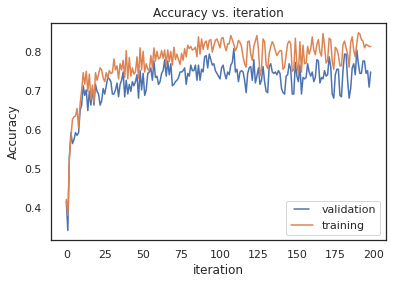

In [ ]:
X_test,X_train,y_test,y_train = cross_validation(3,X_vehicle,new_y_vehicle) 
termination(momentum_vehicle, learning_rate_vehicle, batch_size_vehicle, X_train[0],X_test[0],y_test[0],y_train[0])

0.8085106382978723


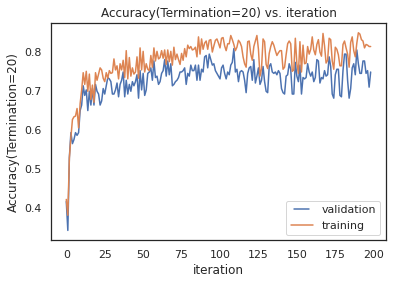

In [ ]:
new_termination(momentum_vehicle, learning_rate_vehicle, batch_size_vehicle, X_train[0],X_test[0],y_test[0],y_train[0], 50)

# **4. Model Comparison (KNN)**

## **4.1 K-NN Classification**

### **4.1.1 Functions**

In [ ]:
def getAcc_single_label(y_true,y_hat):
  N=len(y_true)
  acc=0.0
  for j in range (N):
    #print("y_true",y_true[j]," y_hat",y_hat[j],y_true[j]==y_hat[j])
    if y_true[j]==y_hat[j]:
      acc=acc+1
  #print(acc)
  #print("N",N)
  #print(acc/N)
  return (acc/N)

In [ ]:
import math
def cross_validation_single_label(n_folds,x,y):
    df=np.column_stack([x,y])
    N, D = x.shape
    C= 1
    X_test=[]
    X_train=[]
    y_test=[]
    y_train=[]
    #index=[i for i in range(N)]
    test_index=math.ceil(N/n_folds)
    for i in range(n_folds):
        df_tmp=np.random.permutation(df)
        X_test_tmp=df_tmp[0:test_index,0:D]
        y_test_tmp=df_tmp[0:test_index,D:(D+C)]
        X_train_tmp=df_tmp[test_index:N,0:D]
        y_train_tmp=df_tmp[test_index:N,D:(D+C)]

        X_test.append(X_test_tmp)
        y_test.append(y_test_tmp)
        X_train.append(X_train_tmp)
        y_train.append(y_train_tmp)

    
    return X_test,X_train,y_test,y_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# as there are 9 labels 
# the best option is n=9
def simple_grid_search_KNN(n_neighbors, leaf_size, X, y):
  n_folds=5
  X_test,X_train,y_test,y_train = cross_validation_single_label(n_folds,X,y)
  max_accuracy=-np.inf
  best_parameter={}
  for n in n_neighbors: 
    for l in leaf_size:
      accuracy=0.0 
      for trial in range(n_folds):
        knn = KNeighborsClassifier(n_neighbors = n,leaf_size=l)
        knn.fit(X_train[trial],y_train[trial].ravel())
        y_hat=knn.predict(X_test[trial])
        #print(y_hat.shape)
        #print(y_test[trial].shape)
        accuracy = accuracy+ getAcc_single_label(y_hat, y_test[trial])
        acc=getAcc_single_label(y_hat, y_test[trial])
        #print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))

      accuracy=accuracy/n_folds
      print("n_neighbors: ",n , "     leaf_size:",l,"   Accuracy: ",accuracy)
      if accuracy > max_accuracy:
          max_accuracy = accuracy
          best_parameter['n_neighbor']=n
          best_parameter['leaf_size']=l
  print('MAX Accuracy: ', max_accuracy)
  print("Best parameter: ",best_parameter)
  return best_parameter


#n_neighbor=[9]
#best_parameter=simple_grid_search_KNN(n_neighbor, [5,10,30,50,75,100], X_digits, y_digits)


### **4.1.1 Digits Dataset**


In [ ]:
n_neighbor=[10]
best_parameter=simple_grid_search_KNN(n_neighbor, [5,10,30,50,75,100], X_digits, y_digits)

In [ ]:
import math

leaf_size=best_parameter['leaf_size']
X_test,X_train,y_test,y_train = cross_validation_single_label(5,X_digits,y_digits)
acc=[]
for trial in range(5):
        knn = KNeighborsClassifier(n_neighbors = 10,leaf_size=leaf_size)
        knn.fit(X_train[trial],y_train[trial].ravel())
        y_hat=knn.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        acc.append(getAcc_single_label(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

### **4.1.2 Iris Dataset**


In [ ]:
# winnie:
n_neighbor=[2]
leaf=[5,10,30,50,75,100]
best_parameter=simple_grid_search_KNN(n_neighbor, leaf, X_iris, y_iris)



In [ ]:
leaf_size=best_parameter['leaf_size']
X_test,X_train,y_test,y_train = cross_validation_single_label(5,X_iris,y_iris)
acc=[]
for trial in range(5):
        knn = KNeighborsClassifier(n_neighbors = 2,leaf_size=leaf_size)
        knn.fit(X_train[trial],y_train[trial].ravel())
        y_hat=knn.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        acc.append(getAcc_single_label(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)



### 4.1.3 Vehicle dataset

In [ ]:
n_neighbor=[4]
leaf=[5,10,30,50,75,100]
best_parameter=simple_grid_search_KNN(n_neighbor, leaf, X_vehicle, y_vehicle)


In [ ]:
leaf_size=best_parameter['leaf_size']
X_test,X_train,y_test,y_train = cross_validation_single_label(5,X_vehicle,y_vehicle)
acc=[]
for trial in range(5):
        knn = KNeighborsClassifier(n_neighbors = 4,leaf_size=leaf_size)
        knn.fit(X_train[trial],y_train[trial].ravel())
        y_hat=knn.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        acc.append(getAcc_single_label(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)



## 4.2 Decision Tree Classification

### 4.2.1 Functions

In [ ]:
def getAcc_single_label(y_true,y_hat):
  N=len(y_true)
  acc=0.0
  for j in range (N):
    #print("y_true",y_true[j]," y_hat",y_hat[j],y_true[j]==y_hat[j])
    if y_true[j]==y_hat[j]:
      acc=acc+1
  #print(acc)
  #print("N",N)
  #print(acc/N)
  return (acc/N)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def simple_grid_search_DT(max_depth, min_samples_leaf, max_leaf_nodes, X, y):
  n_folds=5
  X_test,X_train,y_test,y_train = cross_validation_single_label(n_folds,X,y)
  max_accuracy=-np.inf
  best_parameter={}
  for md in max_depth: 
    for msl in min_samples_leaf:
      for mln in max_leaf_nodes:
        accuracy=0.0 
        for trial in range(n_folds):
          decision_tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, max_leaf_nodes=mln,min_samples_split=2)
          decision_tree.fit(X_train[trial],y_train[trial])
          y_hat=decision_tree.predict(X_test[trial])
          #print(y_hat)
          #print(y_test[trial])
          accuracy = accuracy+ getAcc_single_label(y_hat, y_test[trial])
          acc=getAcc_single_label(y_hat, y_test[trial])
          #print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        accuracy=accuracy/n_folds
        print("max_depth: ", md, "  min_sample_leaf: ", msl, "  max_leaf_nodes: ", mln,"  Accuracy: ",accuracy)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_parameter['max_depth']=md
            best_parameter['min_sample_leaf']=msl
            best_parameter['max_leaf_nodes']= mln
  print('MAX Accuracy: ', max_accuracy)
  print("Best parameter: ",best_parameter)
  return best_parameter
'''
max_depth=[5,10,20,30]
min_samples_leaf=[10,15,20,50,75,100]
max_leaf_nodes=[50,100,150,200,250]
simple_grid_search_DT(max_depth,min_samples_leaf,max_leaf_nodes,X_digits,y_digits)
'''

### 4.2.2 Digits Dataset

In [ ]:
max_depth=[5,10,20,30]
min_samples_leaf=[10,15,20,50,75,100]
max_leaf_nodes=[50,100,150,200,250]
best_parameter=simple_grid_search_DT(max_depth,min_samples_leaf,max_leaf_nodes,X_digits,y_digits)

In [ ]:
import math
# Best parameter:  {'max_depth': 20, 'min_sample_leaf': 10, 'max_leaf_nodes': 100} with accuracy 82.22%
md=best_parameter['max_depth']
msl=best_parameter['min_sample_leaf']
mln=best_parameter['max_leaf_nodes']
X_test,X_train,y_test,y_train = cross_validation_single_label(5,X_digits,y_digits)
acc=[]
for trial in range(5):
        dt = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, max_leaf_nodes=mln,min_samples_split=2)
        dt.fit(X_train[trial],y_train[trial])
        y_hat=dt.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        acc.append(getAcc_single_label(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)


### 4.2.3 Iris Dataset

In [ ]:
max_depth=[5,10,20,30]
min_samples_leaf=[10,15,20,50,75,100]
max_leaf_nodes=[50,100,150,200,250]
best_parameter=simple_grid_search_DT(max_depth,min_samples_leaf,max_leaf_nodes,X_iris,y_iris)

In [ ]:
import math
# Best parameter:  {'max_depth': 20, 'min_sample_leaf': 10, 'max_leaf_nodes': 100} with accuracy 82.22%
md=best_parameter['max_depth']
msl=best_parameter['min_sample_leaf']
mln=best_parameter['max_leaf_nodes']
X_test,X_train,y_test,y_train = cross_validation_single_label(5,X_iris,y_iris)
acc=[]
for trial in range(5):
        dt = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, max_leaf_nodes=mln,min_samples_split=2)
        dt.fit(X_train[trial],y_train[trial])
        y_hat=dt.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        acc.append(getAcc_single_label(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

### 4.2.3 Vehicle Dataset

In [ ]:
max_depth=[5,10,20,30]
min_samples_leaf=[10,15,20,50,75,100]
max_leaf_nodes=[50,100,150,200,250]
best_parameter=simple_grid_search_DT(max_depth,min_samples_leaf,max_leaf_nodes, X_vehicle, y_vehicle)

In [ ]:
import math
# Best parameter:  {'max_depth': 5, 'min_sample_leaf': 10, 'max_leaf_nodes': 250} with accuracy 68.82%
md=best_parameter['max_depth']
msl=best_parameter['min_sample_leaf']
mln=best_parameter['max_leaf_nodes']
X_test,X_train,y_test,y_train = cross_validation_single_label(5,X_vehicle,y_vehicle)
acc=[]
for trial in range(5):
        dt = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, max_leaf_nodes=mln,min_samples_split=2)
        dt.fit(X_train[trial],y_train[trial])
        y_hat=dt.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc_single_label(y_hat, y_test[trial]))
        acc.append(getAcc_single_label(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

## **4.3 Multi-class Logistic Regression Model with L2 Penalty**

In [ ]:
def getAcc(y_true,y_hat):
  N=len(y_true)
  acc=0.0
  #y_hat=model.predict(X_digits[1701:1797,:])
  #y_true=new_y_digits[1701:1797,:]
  for i in range(N):
    row = y_true[i]    
    for j in range (len(row)):
      if y_true[i][j]==y_hat[i][j]:
        if y_true[i][j]==1:
          acc=acc+1
      else:
        break
  return acc/N

In [ ]:
def cross_validation(n_folds,x,y):
    df=np.column_stack([x,y])
    N, D = x.shape
    C= len(y[0])
    X_test=[]
    X_train=[]
    y_test=[]
    y_train=[]
    #index=[i for i in range(N)]
    test_index=math.ceil(N/n_folds)
    for i in range(n_folds):
        df_tmp=np.random.permutation(df)
        X_test_tmp=df_tmp[0:test_index,0:D]
        y_test_tmp=df_tmp[0:test_index,D:(D+C)]
        X_train_tmp=df_tmp[test_index:N,0:D]
        y_train_tmp=df_tmp[test_index:N,D:(D+C)]

        X_test.append(X_test_tmp)
        y_test.append(y_test_tmp)
        X_train.append(X_train_tmp)
        y_train.append(y_train_tmp)

    
    return X_test,X_train,y_test,y_train

In [ ]:
class MultiClassLogisticRegression_l2:

    def __init__(self, add_bias = True, l2_reg = 0):
       self.add_bias = add_bias
       self.l2_reg = l2_reg
       pass

    def fit(self, x, y, optimzer):
        if x.ndim == 1:
            x = x[:, None]

        if self.add_bias:
          N = x.shape[0]
          x = np.column_stack([x,np.ones(N)])
        C = len(y[0])
        N, D = x.shape

        def gradient(x, y, w):
          yh = softmax_fn(x, w)
          dW = np.dot(x.T, yh - y)
          dW = (dW + self.l2_reg*w)/N
          return dW

        w0 = np.zeros((D, C))
        self.w = optimzer.run(gradient, x, y, w0)
        return self
  
    def predict(self, x):
        if x.ndim == 1: 
          x = x[:, None]
        N, D = x.shape
        if self.add_bias:
          x = np.column_stack([x,np.ones(N)])
        yh = softmax_fn(x, self.w)
        return yh

In [ ]:
def simple_grid_search_l2(momentum,learning_rate, batch_size,reg_coef,X,y):
      n_folds=5
      X_test,X_train,y_test,y_train = cross_validation(n_folds,X,y)
      max_accuracy=-np.inf
      best_parameter={}
      
      for m in momentum: 
        for l in learning_rate:
          for b in batch_size:
            for j in reg_coef:
              accuracy=0.0
              for trial in range(n_folds):
                  optimizer= GradientDescentwithMomentum(momentum=m,batch_size = b,learning_rate=l, max_iters=200, record_history=True)
                  model = MultiClassLogisticRegression_l2(l2_reg=j) #這裡是唯一改的地方
                  model.fit(X_train[trial],y_train[trial],optimizer)
                  y_hat=model.predict(X_test[trial])
                  accuracy = accuracy+ getAcc(y_hat, y_test[trial])

              accuracy=accuracy/n_folds
              print("momentum:",m,"  leanrning rate:",l, "  batch_size:",b, "   Lambda:",j, "   Accuracy:",accuracy)
              if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_parameter['momentum']=m
                best_parameter['learning_rate']=l
                best_parameter['batch_size']=b
                best_parameter['lambda']=j
      print('MAX Accuracy: ', max_accuracy)
      print("Best parameter: ",best_parameter)
      return best_parameter

**L2 plotting Function**

In [ ]:
def termination_l2(momentum, learning_rate, batch_size,reg_coef,X_train, X_test, y_test, y_train):
  N1,D=X_train.shape
  N2,D=X_test.shape
  C = len(y_test[0])
  X_train_bias= np.column_stack([X_train,np.ones(N1)])/N1
  X_test_bias= np.column_stack([X_test,np.ones(N2)])/N2
  acc1=[]
  acc2=[]
  iteration=[]
  optimizer= GradientDescentwithMomentum(momentum=momentum,batch_size = batch_size,learning_rate=learning_rate, max_iters=200, record_history=True)
  model = MultiClassLogisticRegression_l2(l2_reg=reg_coef)
  model.fit(X_train,y_train,optimizer)
  #y_hat=model.predict(X_test[trial])

  max_accuracy=0.0
  for t,w in enumerate(optimizer.w_history):
    y_hat_train=softmax_fn(X_train_bias, w)
    y_hat_test=softmax_fn(X_test_bias, w)
    #print("train:",getAcc(y_train,y_hat_train)," test:",getAcc(y_test,y_hat_test))
    acc1.append(getAcc(y_train,y_hat_train))
    acc2.append(getAcc(y_test,y_hat_test)) 
    iteration.append(t)
    if getAcc(y_test,y_hat_test) > max_accuracy:
      max_accuracy = getAcc(y_test,y_hat_test) 
    


  print(max_accuracy)
  plotting(iteration,acc2,acc1,'iteration','Accuracy(L2)')


#X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
#termination(0.975,0.005,100,5,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:
def new_termination_l2(momentum, learning_rate, batch_size,reg_coef,X_train, X_test, y_test, y_train,T):
  N1,D=X_train.shape
  N2,D=X_test.shape
  C = len(y_test[0])
  X_train_bias= np.column_stack([X_train,np.ones(N1)])/N1
  X_test_bias= np.column_stack([X_test,np.ones(N2)])/N2
  acc1=[]
  acc2=[]
  iteration=[]
  optimizer= GradientDescentwithMomentum(momentum=momentum,batch_size = batch_size,learning_rate=learning_rate, max_iters=200, record_history=True)
  model = MultiClassLogisticRegression_l2(l2_reg=reg_coef)
  model.fit(X_train,y_train,optimizer)
  #y_hat=model.predict(X_test[trial])

  max_w = np.zeros((C,D))
  max_accuracy=0.0
  for t,w in enumerate(optimizer.w_history):
    y_hat_train=softmax_fn(X_train_bias, w)
    y_hat_test=softmax_fn(X_test_bias, w)
    acc1.append(getAcc(y_train,y_hat_train))
    acc2.append(getAcc(y_test,y_hat_test))

    validation_accuracy= getAcc(y_test,y_hat_test)
    if validation_accuracy > max_accuracy:
      max_accuracy=validation_accuracy
      max_w=w
      
    iteration.append(t)
    if t >T:
      counter=-1
      for i in range(len(acc2)-1-T,len(acc2)-1):
        if acc2[i]<acc2[i+1]:
          counter=0
          break
        else:
          counter=-1
      # non-increase in 20 steps
      if counter ==-1:
        acc1.append(getAcc(y_train,softmax_fn(X_train_bias, max_w)))
        acc2.append(max_accuracy)
        iteration.append(t+1)
        print(counter)
        print("Number of Iteration:",t)
        break

      

  print("Max accuracy:",max_accuracy)
  plotting(iteration,acc2,acc1,'iteration','Accuracy(Termination=20)')

X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
new_termination_l2(0.975,0.005,100,5,X_train[0],X_test[0],y_test[0],y_train[0],10)

### **4.3.1 Digits Dataset**

In [ ]:
N,D = X_digits.shape
reg_coef=[1,5,10]
momentum=[0.9,0.925,0.95,0.975,0.99]
learning_rate=[0.005,0.01,0.025,0.05,0.1,0.5]
batch_size=batch_size=[1,100,math.ceil(N/8),math.ceil(N/4),math.ceil(N/2),N]
simple_grid_search_l2(momentum,learning_rate,batch_size,reg_coef,X_digits,new_y_digits) 

In [ ]:
# best accuracy= 95.94%
best_parameter={'momentum': 0.95, 'learning_rate': 0.05, 'batch_size': 100, 'lambda': 10}

batch_size= best_parameter['batch_size']
momentum=best_parameter['momentum']
learning_rate=best_parameter['learning_rate']
l2_coef = best_parameter['lambda']

X_test,X_train,y_test,y_train = cross_validation(5,X_digits,new_y_digits)
acc=[]
for trial in range(5):
    optimizer= GradientDescentwithMomentum(momentum, batch_size, learning_rate, max_iters=200, record_history=True)
    model = MultiClassLogisticRegression_l2(l2_reg = l2_coef)
    model.fit(X_train[trial],y_train[trial],optimizer)
    y_hat=model.predict(X_test[trial])
      
    print("trial:",trial,"accuracy",getAcc(y_hat, y_test[trial]))
    acc.append(getAcc(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

In [ ]:
X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
termination(momentum,learning_rate,batch_size,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:

best_parameter={'momentum': 0.95, 'learning_rate': 0.1, 'batch_size': 100, 'lambda': 10}

batch_size= best_parameter['batch_size']
momentum=best_parameter['momentum']
learning_rate=best_parameter['learning_rate']
l2_coef = best_parameter['lambda']
X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
termination_l2(momentum,learning_rate,batch_size,l2_coef,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:
# new termination
X_test,X_train,y_test,y_train = cross_validation(3,X_digits,new_y_digits)
new_termination_l2(0.975,0.005,100,5,X_train[0],X_test[0],y_test[0],y_train[0],5)

### **4.3.2 Iris Dataset**


In [ ]:
# winnie
N,D = X_iris.shape
reg_coef=[1,5,10]
momentum=[0.9,0.95,0.99]
learning_rate=[0.005,0.01,0.05,0.1]
batch_size=batch_size=[1,math.ceil(N/8),math.ceil(N/4),math.ceil(N/2),N]
simple_grid_search_l2(momentum,learning_rate,batch_size,reg_coef,X_iris,new_y_iris) 

In [ ]:
# accuracy =100%
best_parameter = {'momentum': 0.9, 'learning_rate': 0.005, 'batch_size': 38, 'lambda': 1}
momentum = best_parameter['momentum']
learning_rate=best_parameter['learning_rate']
batch_size=best_parameter['batch_size']
lambda0 = best_parameter['lambda']

In [ ]:
X_test,X_train,y_test,y_train = cross_validation(5,X_iris,new_y_iris)
acc=[]
for trial in range(5):
        
        optimizer= GradientDescentwithMomentum(momentum=momentum,batch_size = batch_size,learning_rate=learning_rate, max_iters=200, record_history=True)
        model = MultiClassLogisticRegression_l2(l2_reg=lambda0)
        model.fit(X_train[trial],y_train[trial],optimizer)
        y_hat=model.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc(y_hat, y_test[trial]))
        acc.append(getAcc(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

In [ ]:
X_test,X_train,y_test,y_train = cross_validation(3,X_iris,new_y_iris)
termination_l2(momentum,learning_rate,batch_size,lambda0,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:
# new termination
# new termination
X_test,X_train,y_test,y_train = cross_validation(3,X_iris,new_y_iris)
new_termination_l2(0.975,0.005,100,5,X_train[0],X_test[0],y_test[0],y_train[0],5)

### **4.3.3 Vehicle Dataset**

**Optimal hyperparameter**

In [ ]:
def getAcc(y_true,y_hat):
  N=len(y_true)
  acc=0.0
  #y_hat=model.predict(X_digits[1701:1797,:])
  #y_true=new_y_digits[1701:1797,:]
  for i in range(N):
    row = y_true[i] 
    #print(row)   
    for j in range (len(row)):
      if y_true[i][j]==y_hat[i][j]:
        if y_true[i][j]==1:
          acc=acc+1
      else:
        break
  return acc/N

In [ ]:
N,D = X_vehicle.shape
reg_coef=[0,1,5]
momentum=[0.9,0.95,0.99]
learning_rate=[0.005,0.01,0.05,0.1,0.5]
batch_size=batch_size=[1,math.ceil(N/4),math.ceil(N/2),N]
simple_grid_search_l2(momentum,learning_rate,batch_size,reg_coef,X_vehicle,new_y_vehicle) 

KeyboardInterrupt: ignored

In [ ]:
best_parameter={'momentum': 0.99, 'learning_rate': 0.1, 'batch_size': 846, 'lambda': 1}
momentum = best_parameter['momentum']
learning_rate=best_parameter['learning_rate']
batch_size=best_parameter['batch_size']
lambda0 = best_parameter['lambda']

In [ ]:
X_test,X_train,y_test,y_train = cross_validation(5,X_vehicle,new_y_vehicle)
acc=[]
for trial in range(5):
        
        optimizer= GradientDescentwithMomentum(momentum=momentum,batch_size = batch_size,learning_rate=learning_rate, max_iters=200, record_history=True)
        model = MultiClassLogisticRegression_l2(l2_reg=lambda0)
        model.fit(X_train[trial],y_train[trial],optimizer)
        y_hat=model.predict(X_test[trial])
       
        print("trial:",trial,"accuracy",getAcc(y_hat, y_test[trial]))
        acc.append(getAcc(y_hat, y_test[trial]))
mean=sum(acc)/5
std=0.0
for i in acc:
  std=std+(i-mean)*(i-mean)
std=math.sqrt(std/5)


print("The mean accuracy of 5-fold CV:",mean,"  std:",std)

trial: 0 accuracy 0.32941176470588235
trial: 1 accuracy 0.34705882352941175
trial: 2 accuracy 0.4470588235294118
trial: 3 accuracy 0.25882352941176473
trial: 4 accuracy 0.31176470588235294
The mean accuracy of 5-fold CV: 0.3388235294117647   std: 0.06164975297211248


In [ ]:
X_test,X_train,y_test,y_train = cross_validation(3,X_vehicle,new_y_vehicle)
termination(momentum,learning_rate,batch_size,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:
X_test,X_train,y_test,y_train = cross_validation(3,X_vehicle,new_y_vehicle)
termination_l2(momentum,learning_rate,batch_size,lambda0,X_train[0],X_test[0],y_test[0],y_train[0])

In [ ]:
# new termination
X_test,X_train,y_test,y_train = cross_validation(3,X_vehicle,new_y_vehicle)
new_termination_l2(0.975,0.005,100,5,X_train[0],X_test[0],y_test[0],y_train[0],5)

## **4.4 Confusion Matrix**

In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

### **4.4.1 Digits Dataset**


In [ ]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, new_y_digits, test_size=0.40)
optimizer = GradientDescentwithMomentum(momentum=0.975 ,batch_size = 899,learning_rate=0.005, max_iters=200, record_history=True)
model = MultiClassLogisticRegression()
model.fit(X_train_digits,y_train_digits,optimizer)
y_pred_digits = model.predict(X_test_digits)
multilabel_confusion_matrix(y_test_digits, y_pred_digits)

NameError: ignored

In [ ]:
X_train_digits, X_test_digits, y_train_digits2, y_test_digits2 = train_test_split(X_digits, y_digits, test_size=0.40)
knn_digits = KNeighborsClassifier(n_neighbors = 9,leaf_size=5)
knn_digits.fit(X_train_digits,y_train_digits2.ravel())
y_digits_knn=knn_digits.predict(X_test_digits)
multilabel_confusion_matrix(y_test_digits2, y_digits_knn)

In [ ]:
dt_digits = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, max_leaf_nodes=100)
dt_digits.fit(X_train_digits,y_train_digits2)
y_digits_df=dt_digits.predict(X_test_digits)
multilabel_confusion_matrix(y_test_digits2, y_digits_dt)

In [ ]:
optimizer_digits_l2 = GradientDescentwithMomentum(momentum=0.95,batch_size = 100,learning_rate=0.005, max_iters=200, record_history=True)
model_digits_l2 = MultiClassLogisticRegression_l2(l2_reg = 10)
model_digits_l2.fit(X_train_digits,y_train_digits,optimizer_digits_l2)
y_pred_digits_l2 = model.predict(X_test_digits)
multilabel_confusion_matrix(y_test_digits, y_pred_digits_l2)

### **4.4.2 Iris Dataset**


In [ ]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, new_y_iris, test_size=0.40)
optimizer = GradientDescentwithMomentum(momentum=0.9 ,batch_size = 19,learning_rate=0.005, max_iters=200, record_history=True) #fox this
model = MultiClassLogisticRegression()
model.fit(X_train_iris,y_train_iris,optimizer)
y_pred_iris = model.predict(X_test_iris)
multilabel_confusion_matrix(y_test_iris, y_pred_iris)

In [ ]:
X_train_iris, X_test_iris, y_train_iris2, y_test_iris2 = train_test_split(X_iris, y_iris, test_size=0.40)
knn_iris = KNeighborsClassifier(n_neighbors = 2,leaf_size=5)
knn_iris.fit(X_train_iris,y_train_iris.ravel())
y_iris_knn=knn_iris.predict(X_test_iris)
multilabel_confusion_matrix(y_test_iris2, y_iris_knn)

In [ ]:
dt_iris = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, max_leaf_nodes=250) #fix this
dt_iris.fit(X_train_iris,y_train_iris)
y_iris_df=dt_iris.predict(X_test_iris)
multilabel_confusion_matrix(y_test_iris, y_iris_dt)

In [ ]:
optimizer_iris_l2 = GradientDescentwithMomentum(momentum=0.9 ,batch_size = 38,learning_rate=0.005, max_iters=200, record_history=True) #fix this
model_iris_l2 = MultiClassLogisticRegression_l2(l2_reg = 1)
model_iris_l2.fit(X_train_iris,y_train_iris,optimizer_iris_l2)
y_pred_iris_l2 = model.predict(X_test_iris)
multilabel_confusion_matrix(y_test_iris, y_pred_iris_l2)

### **4.4.3 Vehicle Dataset**

In [ ]:
X_train_vehicle, X_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(X_vehicle, new_y_vehicle, test_size=0.40)
optimizer = GradientDescentwithMomentum(momentum=0.95 ,batch_size = 423,learning_rate=0.005, max_iters=200, record_history=True)
model = MultiClassLogisticRegression()
model.fit(X_train_vehicle,y_train_vehicle,optimizer)
y_pred_vehicle = model.predict(X_test_vehicle)
multilabel_confusion_matrix(y_test_vehicle, y_pred_vehicle)

In [ ]:
X_train_vehicle, X_test_vehicle, y_train_vehicle2, y_test_vehicle2 = train_test_split(X_vehicle, y_vehicle, test_size=0.40)
knn_vehicle = KNeighborsClassifier(n_neighbors = 4,leaf_size=100)
knn_vehicle.fit(X_train_vehicle,y_train_vehicle2.ravel())
y_vehicle_knn=knn_vehicle.predict(X_test_vehicle)
multilabel_confusion_matrix(y_test_vehicle2, y_vehicle_knn)

In [ ]:
dt_vehicle = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, max_leaf_nodes=250) 
dt_vehicle.fit(X_train_vehicle,y_train_vehicle2)
y_vehicle_df=dt_vehicle.predict(X_test_vehicle)
multilabel_confusion_matrix(y_test_vehicle2, y_vehicle_dt)

In [ ]:
optimizer_vehicle_l2 = GradientDescentwithMomentum(momentum=0.99 ,batch_size = 846,learning_rate=0.001, max_iters=200, record_history=True)
model_vehicle_l2 = MultiClassLogisticRegression_l2(l2_reg = 1) 
model_vehicle_l2.fit(X_train_vehicle,y_train_vehicle,optimizer_vehicle_l2)
y_pred_vehicle_l2 = model.predict(X_test_vehicle)
multilabel_confusion_matrix(y_test_vehicle, y_pred_vehicle_l2)